In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
#setting the display options for pandas
pd.set_option('display.notebook_repr_html', True) #display pandas DataFrames as HTML tables
pd.set_option('display.precision', 2) #sets the precision for displaying numerical data to 2 decimal places
pd.set_option('display.float_format', '{:.2f}'.format) #sets the floating-point number format to two decimal 
                                                       #places using Python string formatting

In [3]:
#load the data
m = pd.read_csv('military.csv', skiprows=4)

In [4]:
m.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2015,2016,2017,2018,2019,2020,2021,2022,2023,Unnamed: 68
0,Aruba,ABW,Military expenditure (current USD),MS.MIL.XPND.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Africa Eastern and Southern,AFE,Military expenditure (current USD),MS.MIL.XPND.CD,NaN,NaN,NaN,321692705.29,426835467.93,523675713.75,...,15383318097.65,13659413872.35,16172675472.11,12270486684.64,11691723928.95,11014698607.74,11219314898.64,11664366311.72,NaN,NaN
2,Afghanistan,AFG,Military expenditure (current USD),MS.MIL.XPND.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,199517108.76,185878310.06,191407113.24,198074728.57,226306243.73,279576954.93,278250788.01,NaN,NaN,NaN
3,Africa Western and Central,AFW,Military expenditure (current USD),MS.MIL.XPND.CD,NaN,65730524.38,90028246.01,100571059.53,118886714.16,145634004.19,...,5016333439.14,5575535214.60,5510400667.69,6325121729.79,6166715027.35,7186733072.88,9682825757.85,8409466942.91,NaN,NaN
4,Angola,AGO,Military expenditure (current USD),MS.MIL.XPND.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,3608299114.62,2764054937.16,3062872913.98,1983613748.00,1470938717.29,993594404.63,981451011.87,1622763731.95,NaN,NaN


In [5]:
#if reading a xls or xlsx file...
!pip install xlrd

In [ ]:
#optional
#load the data, if excel
m = pd.read_excel('military.xls', skiprows=4)

In [6]:
#print the names of the columns to check for any differences or mistakes.
print(m.columns)

Index(['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code',
       '1960', '1961', '1962', '1963', '1964', '1965', '1966', '1967', '1968',
       '1969', '1970', '1971', '1972', '1973', '1974', '1975', '1976', '1977',
       '1978', '1979', '1980', '1981', '1982', '1983', '1984', '1985', '1986',
       '1987', '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995',
       '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004',
       '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013',
       '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021', '2022',
       '2023', 'Unnamed: 68'],
      dtype='object')


In [7]:
#finding the top 10 military spenders from 2017-2022

#sum the military spending across all years for each country
military_total = m.groupby('Country Name').sum()

#calculate the total military spending for each country from 2017 to 2022
military_total['Total'] = military_total.loc[:, '2017':'2022'].sum(axis=1)

#sort the countries based on their total military spending
top_ten_countries = military_total.nlargest(50, 'Total')['Total']

#print the top ten countries
print(top_ten_countries)

Country Name
World                                                  11589395915079.48
High income                                             8072223875278.90
OECD members                                            7561254916615.99
Post-demographic dividend                               7243125601051.50
North America                                           4667894257346.34
United States                                           4525159027000.00
IDA & IBRD total                                        3669866108213.37
Low & middle income                                     3514267123425.34
Middle income                                           3477480662441.62
IBRD only                                               3463774600427.41
Late-demographic dividend                               2592467961091.55
East Asia & Pacific                                     2574828087984.45
Upper middle income                                     2565516447293.26
Europe & Central Asia                 

In [8]:
#listing the top countries
top_countries = ['United States', 'China', 'India', 'Saudi Arabia', 'Russian Federation', \
                 'United Kingdom', 'Germany', 'France', 'Japan', 'Korea, Rep.']

#years 2017 to 2022
years = list(range(2017, 2023))
years

[2017, 2018, 2019, 2020, 2021, 2022]

In [9]:
#filter rows for the top countries
military = m[m['Country Name'].isin(top_countries)]

#filter columns for the specified years
military = military[['Country Name'] + [str(year) for year in years]]


military

,Country Name,2017,2018,2019,2020,2021,2022
40,China,210443034740.97,232530595985.27,240332555458.15,257973429833.57,285930518056.05,291958428460.21
55,Germany,42281112684.64,46497675955.76,49079444693.24,53318705117.98,56513126773.89,55759747827.04
77,France,49195662250.32,51409812838.59,50118929211.93,52747064858.09,56646996215.70,53638748769.43
81,United Kingdom,52075008432.05,55832916405.25,56567602040.82,58332371794.87,67500687757.91,68462578611.61
109,India,64559435280.69,66257801718.28,71468900524.30,72937064047.80,76348538793.92,81363188268.80
119,Japan,45058468760.65,48535909410.59,50778006586.01,51396536058.53,50957471034.03,45992092171.89
126,"Korea, Rep.",39170682135.62,43069973342.88,44102240752.18,46117096574.58,50873788105.29,46365420707.42
202,Russian Federation,66913033536.78,61609204756.42,65201335848.36,61712537168.94,65907705047.10,86373102251.41
205,Saudi Arabia,70400000000.00,74612266666.67,65362666666.67,64558400000.00,63194666666.67,75013333333.33
251,United States,646752927000.00,682491400000.00,734344100000.00,778397200000.00,806230200000.00,876943200000.00


In [10]:
#option 1
#reindexing the DataFrames to match the top_countries_desc order
military = military.set_index('Country Name').loc[top_countries].reset_index()
military

,Country Name,2017,2018,2019,2020,2021,2022
0,United States,646752927000.00,682491400000.00,734344100000.00,778397200000.00,806230200000.00,876943200000.00
1,China,210443034740.97,232530595985.27,240332555458.15,257973429833.57,285930518056.05,291958428460.21
2,India,64559435280.69,66257801718.28,71468900524.30,72937064047.80,76348538793.92,81363188268.80
3,Saudi Arabia,70400000000.00,74612266666.67,65362666666.67,64558400000.00,63194666666.67,75013333333.33
4,Russian Federation,66913033536.78,61609204756.42,65201335848.36,61712537168.94,65907705047.10,86373102251.41
5,United Kingdom,52075008432.05,55832916405.25,56567602040.82,58332371794.87,67500687757.91,68462578611.61
6,Germany,42281112684.64,46497675955.76,49079444693.24,53318705117.98,56513126773.89,55759747827.04
7,France,49195662250.32,51409812838.59,50118929211.93,52747064858.09,56646996215.70,53638748769.43
8,Japan,45058468760.65,48535909410.59,50778006586.01,51396536058.53,50957471034.03,45992092171.89
9,"Korea, Rep.",39170682135.62,43069973342.88,44102240752.18,46117096574.58,50873788105.29,46365420707.42


In [ ]:
#option 2
#resetting the index
military.reset_index(drop=True, inplace=True) #drop the old index, modifying the DataFrame in place
military

In [11]:
military.head(10) # visualize the data

,Country Name,2017,2018,2019,2020,2021,2022
0,United States,646752927000.00,682491400000.00,734344100000.00,778397200000.00,806230200000.00,876943200000.00
1,China,210443034740.97,232530595985.27,240332555458.15,257973429833.57,285930518056.05,291958428460.21
2,India,64559435280.69,66257801718.28,71468900524.30,72937064047.80,76348538793.92,81363188268.80
3,Saudi Arabia,70400000000.00,74612266666.67,65362666666.67,64558400000.00,63194666666.67,75013333333.33
4,Russian Federation,66913033536.78,61609204756.42,65201335848.36,61712537168.94,65907705047.10,86373102251.41
5,United Kingdom,52075008432.05,55832916405.25,56567602040.82,58332371794.87,67500687757.91,68462578611.61
6,Germany,42281112684.64,46497675955.76,49079444693.24,53318705117.98,56513126773.89,55759747827.04
7,France,49195662250.32,51409812838.59,50118929211.93,52747064858.09,56646996215.70,53638748769.43
8,Japan,45058468760.65,48535909410.59,50778006586.01,51396536058.53,50957471034.03,45992092171.89
9,"Korea, Rep.",39170682135.62,43069973342.88,44102240752.18,46117096574.58,50873788105.29,46365420707.42


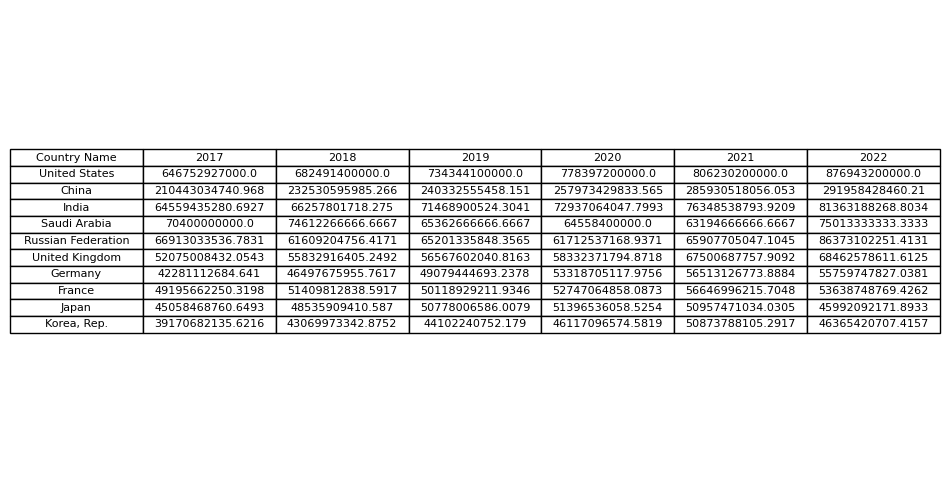

In [12]:
#data shows the top 10 military spenders 

#create a table plot
fig, ax = plt.subplots(figsize=(12, 6))
ax.axis('off')  # Hide the axes
ax.table(cellText=military.head(10).values,
         colLabels=military.columns,
         cellLoc='center',
         loc='center')

#save the chart as a PNG file with high resolution (300 DPI)
plt.savefig('top_10_military.png', dpi=300, bbox_inches='tight', pad_inches=0.2) #increase the padding
plt.show()

In [13]:
#creating graph showing the military spending of the top 10 countries

def plot_military_spending(military):
    #extracting unique country names from the 'Country Name' column
    countries = military['Country Name'].unique()

    #reordering countries to match the top_countries list
    countries = [country for country in top_countries if country in countries]

    #plotting the military spending for each country
    plt.figure(figsize=(12, 8))  # Set a larger figure size
    for country in countries:
        plt.plot(military.loc[military['Country Name'] == country, '2017':'2022'].values.flatten() / 1e9, label=country)

    #add title and labels to the plot
    plt.title('Military Spending of Countries (2017-2022)', fontsize=16, fontweight='bold')
    plt.xlabel('Year', fontsize=14)
    plt.ylabel('Military Spending (USD, Billions)', fontsize=14)
    
    #add a legend with country names
    plt.legend(title='Country', loc='upper left', fontsize=10, bbox_to_anchor=(1.02, 1), ncol=1)

    #set x-axis labels
    plt.xticks(ticks=range(6), labels=['2017', '2018', '2019', '2020', '2021', '2022'], fontsize=12)
    plt.yticks(fontsize=12)

    plt.grid(False)
    plt.margins(x=0)
    
    #save the chart as a PNG file with high resolution (300 DPI)
    plt.savefig('military_spending.png', dpi=300, bbox_inches='tight', pad_inches=0.2) #increase the padding
    plt.show() 

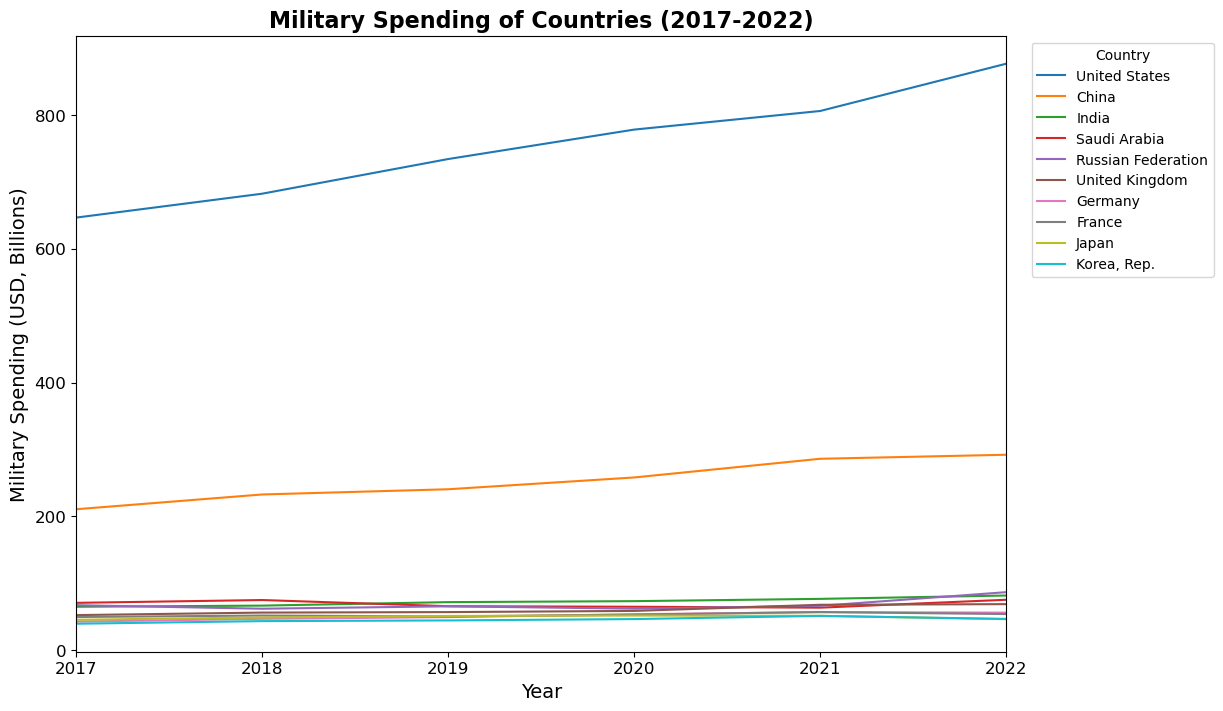

In [14]:
plot_military_spending(military)